In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
#loading in data from file
data = pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
#taking a peak at the data
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#checking values within humidity
data['humidity'].describe()

count    2200.000000
mean       71.481779
std        22.263812
min        14.258040
25%        60.261953
50%        80.473146
75%        89.948771
max        99.981876
Name: humidity, dtype: float64

In [ ]:
#checking for any missing values
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

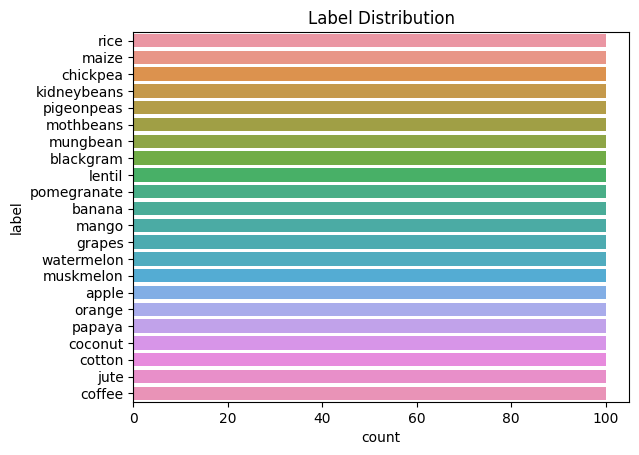

In [ ]:
#checking if data spread is even
sns.countplot(y='label', data=data)
plt.title('Label Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2

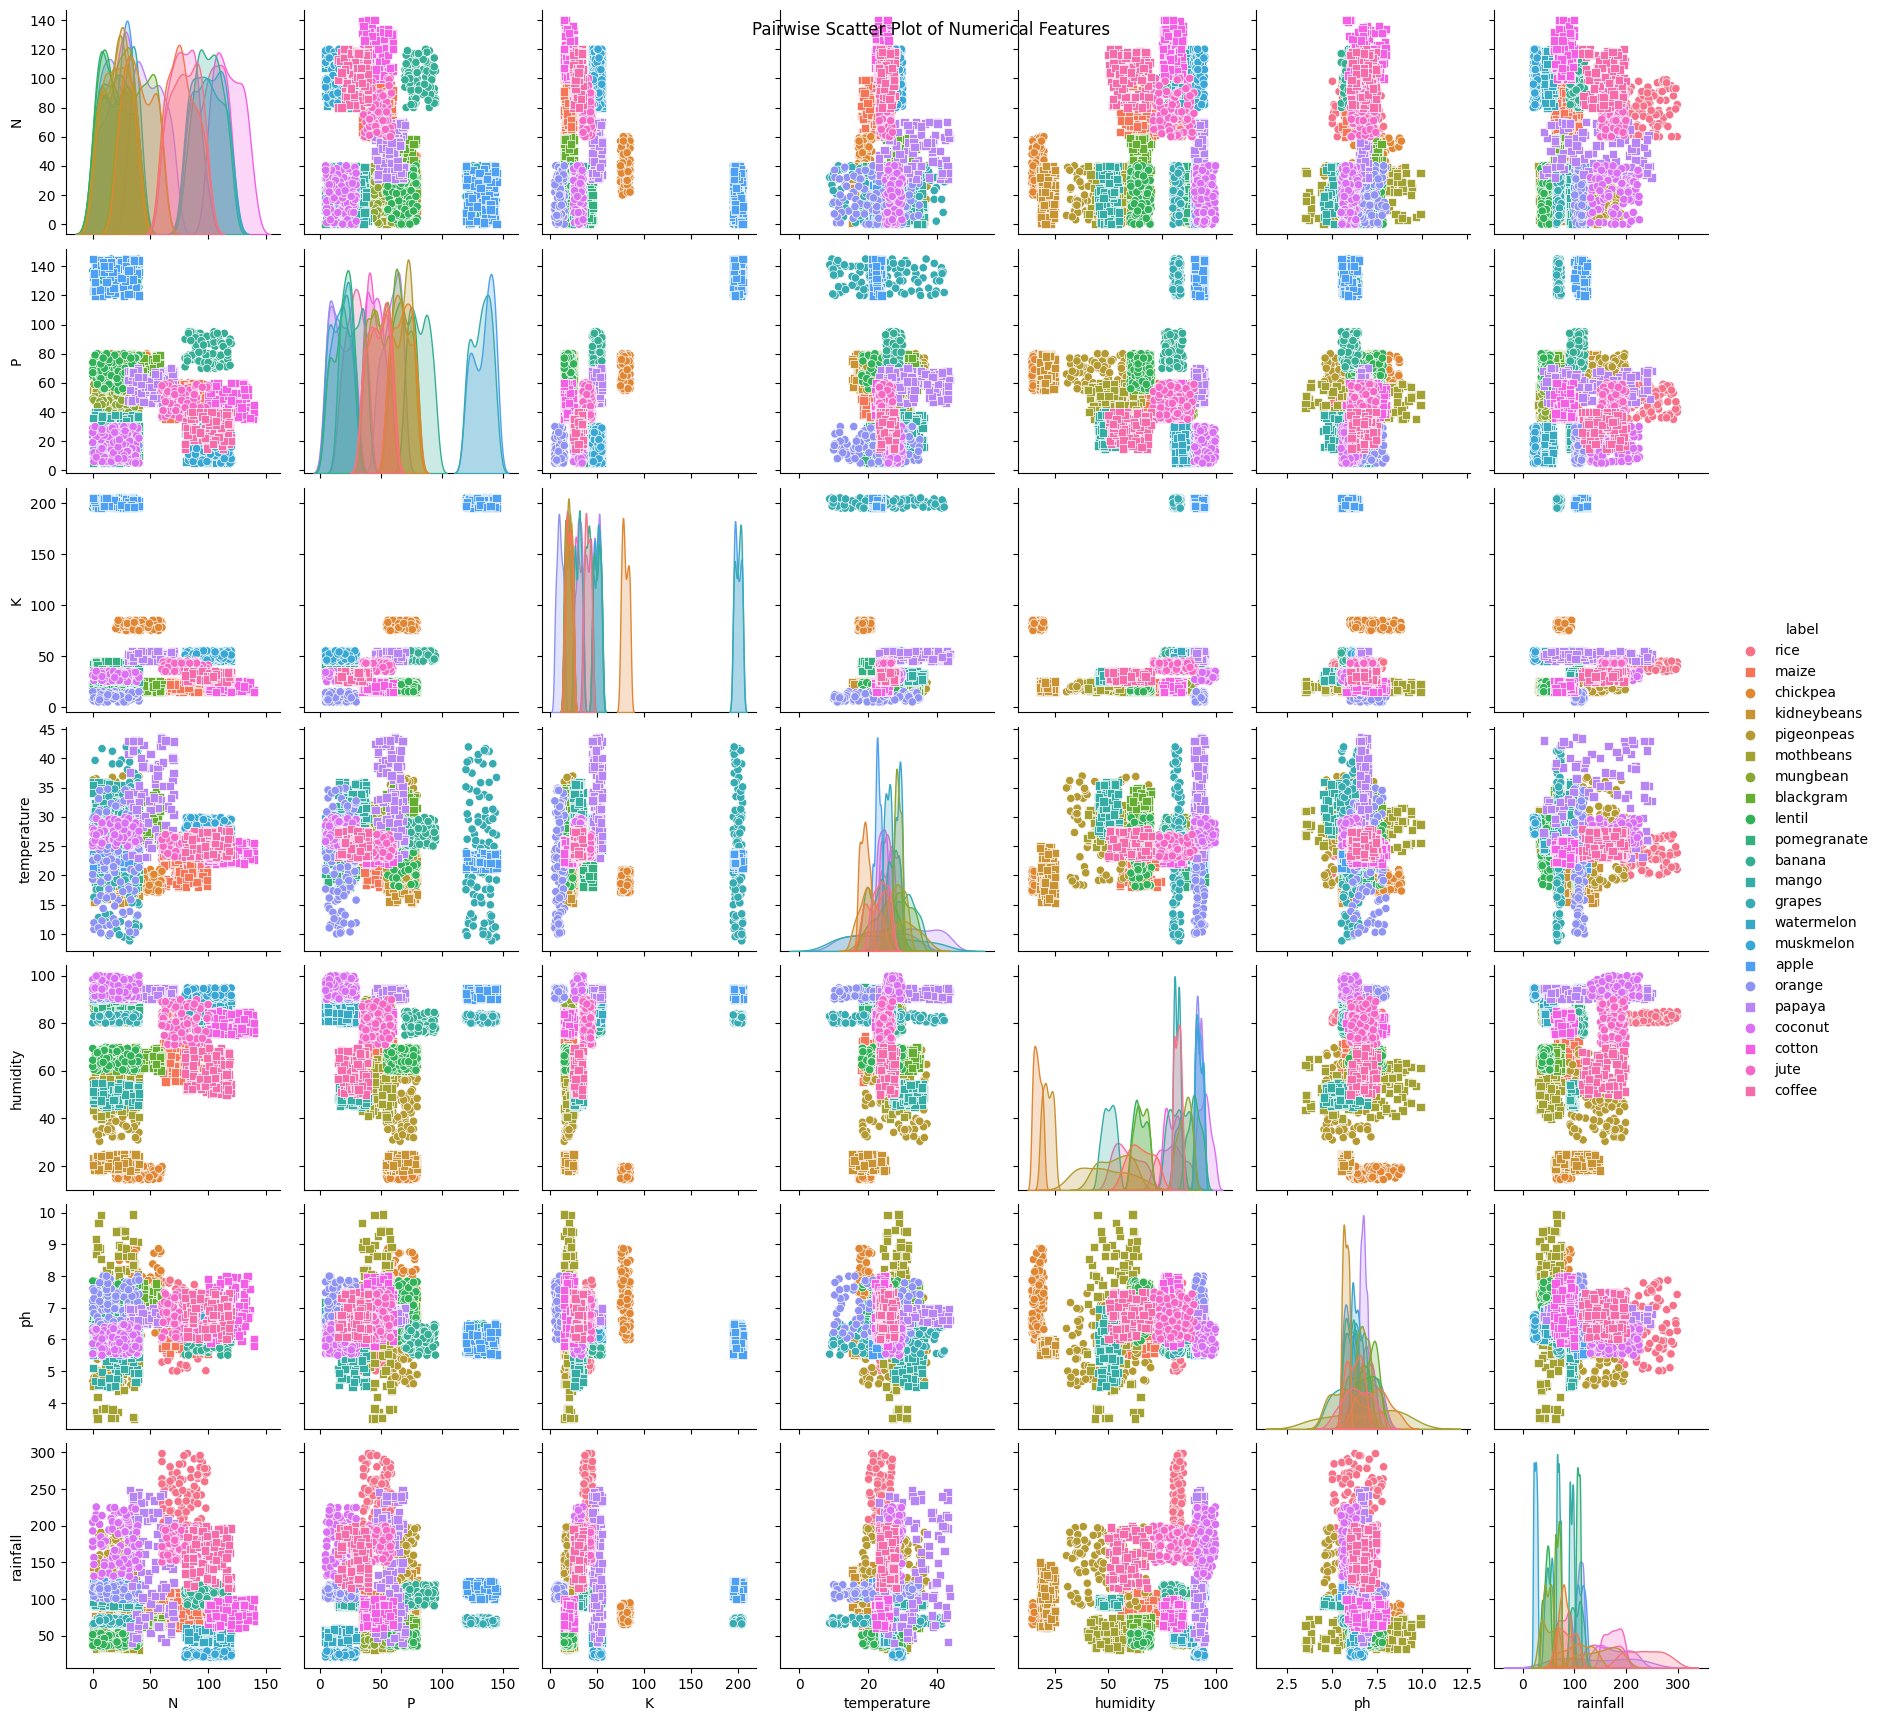

In [ ]:
#creating a pair plot to visualize comparison of all numerical features
sns.pairplot(data=data,hue='label', markers=['o', 's'] )
plt.suptitle('Pairwise Scatter Plot of Numerical Features')
plt.show()

<ipython-input-27-856fd54e7960>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


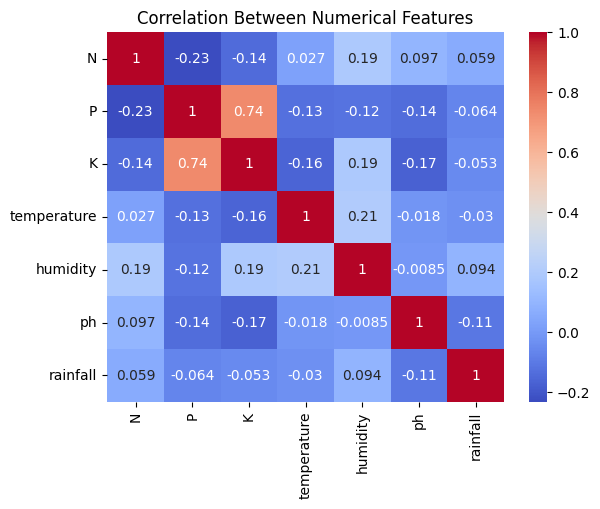

In [ ]:
#creating a heat map to check correlation between numerical features
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

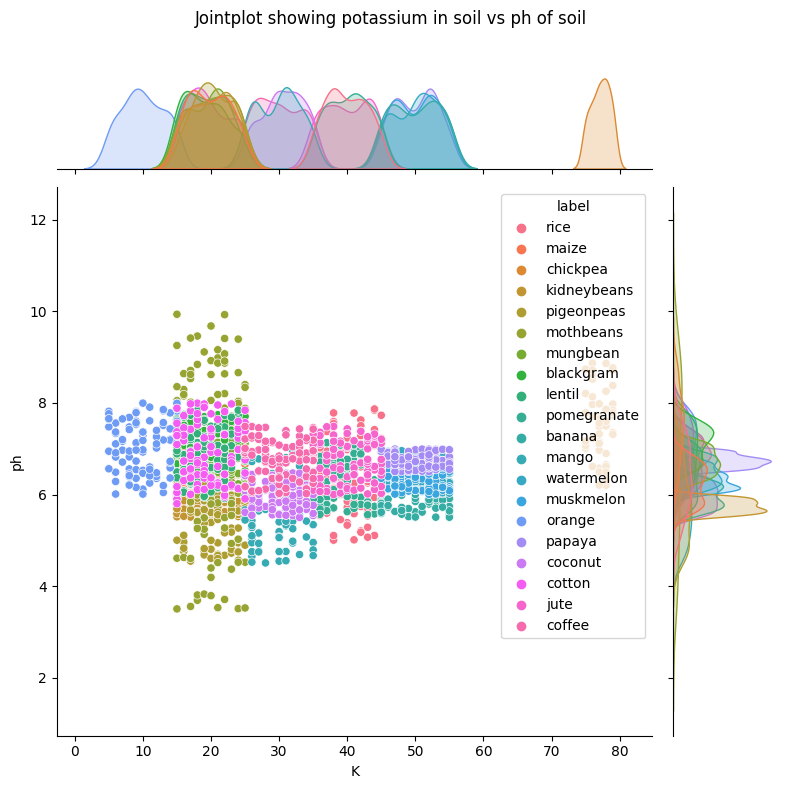

In [ ]:
#creating a joint plot to compare relationship and see distriubtion of ph and potassium
rp = sns.jointplot(x = 'K', y = 'ph', data = data[(data['K']<80)&(data['ph']<12)], hue='label', height = 8)
rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
rp.fig.suptitle('Jointplot showing potassium in soil vs ph of soil')
plt.show()

Text(0, 0.5, 'crops')

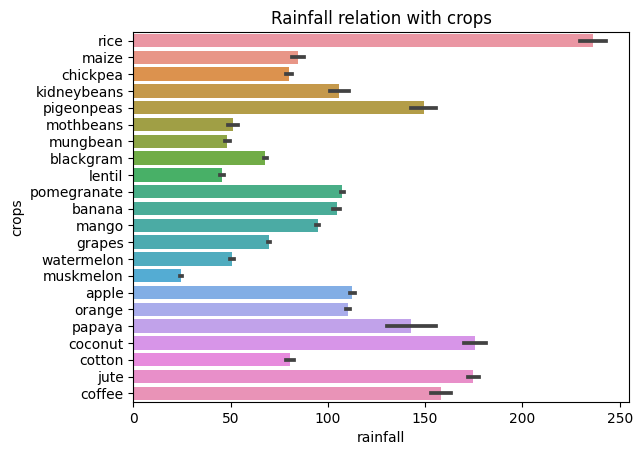

In [ ]:
#creating a bar plot to visualize rainfall needed per crop
sns.barplot(y="label", x="rainfall", data=data)
plt.title("Rainfall relation with crops")
plt.ylabel("crops")

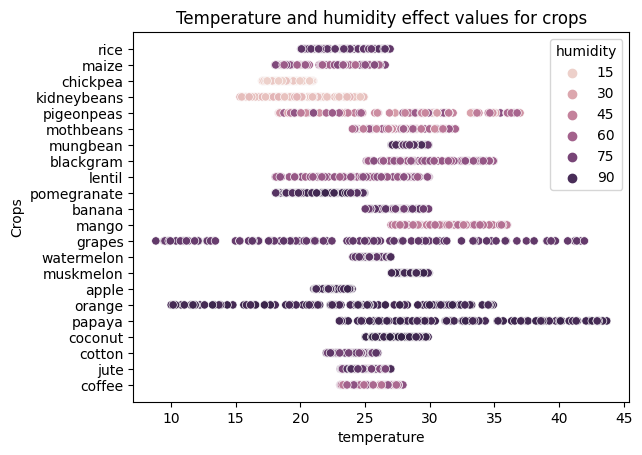

In [ ]:
 #plotting temperature effects on crops, with emphasis on humidity - taken from https://www.kaggle.com/code/dhruvdange/crop-predictions-with-visualization
sns.scatterplot(data=data, x="temperature", y="label", hue="humidity")
plt.title("Temperature and humidity effect values for crops")
plt.ylabel("Crops")
plt.show()

In [ ]:
#onehot encoding categorical feature
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [ ]:
#creating x and y variables for training/testing
X = data.drop('label',axis=1)
y = data['label']

In [ ]:
#training and testing dat sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
#scaling features to make sure even importance across all features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#calling and fitting all models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




#calling KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

#calling GNB model
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

#calling SVM models
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

#calling logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

#calling decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#calling random forest
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train.values.ravel())



RandomForestClassifier(n_estimators=10, random_state=1)

In [ ]:
#creating all Cross Validation accuracy scores
k = 5
kf = KFold(n_splits=k)

knnresult = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
gnbresult = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
linresult = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
rbfresult = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
polyresult = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
sigresult = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
lrresult = cross_val_score(lr, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
dtresult = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
rfresult = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')




from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)

knnresult2 = cross_val_score(knn, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
gnbresult2 = cross_val_score(gnb, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
linresult2 = cross_val_score(linear, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
rbfresult2 = cross_val_score(rbf, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
polyresult2 = cross_val_score(poly, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
sigresult2 = cross_val_score(sig, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
lrresult2 = cross_val_score(lr, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
dtresult2 = cross_val_score(dt, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
rfresult2 = cross_val_score(rf, X_train, y_train.ravel(), cv = skf, scoring='accuracy')





In [ ]:
#printing CV accuracy scores
print('5 Fold Cross Validation')
print('---------------------------------------')
print(f' KNN Avg accuracy: {knnresult.mean():.5f}')
print(f' GNB Avg accuracy: {gnbresult.mean():.5f}')
print(f' Linear Avg accuracy: {linresult.mean():.5f}')
print(f' RBF Avg accuracy: {rbfresult.mean():.5f}')
print(f' Poly Avg accuracy: {polyresult.mean():.5f}')
print(f' Sig Avg accuracy: {sigresult.mean():.5f}')
print(f' LR Avg accuracy: {lrresult.mean():.5f}')
print(f' DT Avg accuracy: {dtresult.mean():.5f}')
print(f' RF Avg accuracy: {rfresult.mean():.5f}\n')

print('Stratified 10 Fold Cross Validation')
print('---------------------------------------')
print(f' KNN Avg accuracy:{knnresult2.mean():.5f}')
print(f' GNB Avg accuracy:{gnbresult2.mean():.5f}')
print(f' Linear Avg accuracy:{linresult2.mean():.5f}')
print(f' RBG Avg accuracy:{rbfresult2.mean():.5f}')
print(f' Poly Avg accuracy:{polyresult2.mean():.5f}')
print(f' Sig Avg accuracy:{sigresult2.mean():.5f}')
print(f' LR Avg accuracy:{lrresult2.mean():.5f}')
print(f' DT Avg accuracy:{dtresult2.mean():.5f}')
print(f' RF Avg accuracy:{rfresult2.mean():.5f}')

5 Fold Cross Validation
---------------------------------------
 KNN Avg accuracy: 0.96494
 GNB Avg accuracy: 0.99416
 Linear Avg accuracy: 0.98312
 RBF Avg accuracy: 0.98442
 Poly Avg accuracy: 0.91169
 Sig Avg accuracy: 0.81883
 LR Avg accuracy: 0.96883
 DT Avg accuracy: 0.98247
 RF Avg accuracy: 0.99091

Stratified 10 Fold Cross Validation
---------------------------------------
 KNN Avg accuracy:0.96818
 GNB Avg accuracy:0.99416
 Linear Avg accuracy:0.98377
 RBG Avg accuracy:0.98636
 Poly Avg accuracy:0.91299
 Sig Avg accuracy:0.80390
 LR Avg accuracy:0.97403
 DT Avg accuracy:0.98247
 RF Avg accuracy:0.99286


In [ ]:
#predicting with various models
y_pred_knn = knn.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
svm_linear_pred = linear.predict(X_test)
svm_poly_pred = poly.predict(X_test)
svm_sig_pred = sig.predict(X_test)
svm_rbf_pred = rbf.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)



In [ ]:
#printing classification reports
from sklearn.metrics import classification_report

print('KNN Classification Report:\n')
print(classification_report(y_test, y_pred_knn))
print('--------------------------------------------------------')
print('GNB Classification Report:\n')
print(classification_report(y_test, y_pred_gnb))
print('--------------------------------------------------------')
print('SVB Linear Classification Report:\n')
print(classification_report(y_test, svm_linear_pred))
print('--------------------------------------------------------')
print('SVB Poly Classification Report:\n')
print(classification_report(y_test, svm_poly_pred))
print('--------------------------------------------------------')
print('SVB Sigmoid Classification Report:\n')
print(classification_report(y_test, svm_sig_pred))
print('--------------------------------------------------------')
print('SVB RBF Classification Report:\n')
print(classification_report(y_test, svm_rbf_pred))
print('--------------------------------------------------------')
print('LR Classification Report:\n')
print(classification_report(y_test, y_pred_lr))
print('--------------------------------------------------------')
print('DT Classification Report:\n')
print(classification_report(y_test, y_pred_dt))
print('--------------------------------------------------------')
print('RF Classification Report:\n')
print(classification_report(y_test, y_pred_rf))


KNN Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        30
           2       0.97      0.97      0.97        31
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        29
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        30
           8       0.82      1.00      0.90        31
           9       0.93      1.00      0.96        26
          10       0.92      1.00      0.96        22
          11       1.00      0.96      0.98        27
          12       0.97      1.00      0.98        28
          13       1.00      0.92      0.96        36
          14       1.00      1.00      1.00        29
          15       1.00      1.00      1.00        30
          16       1.00      0.94      0.97        34

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle
# Saving the trained model and the scaler to files
with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

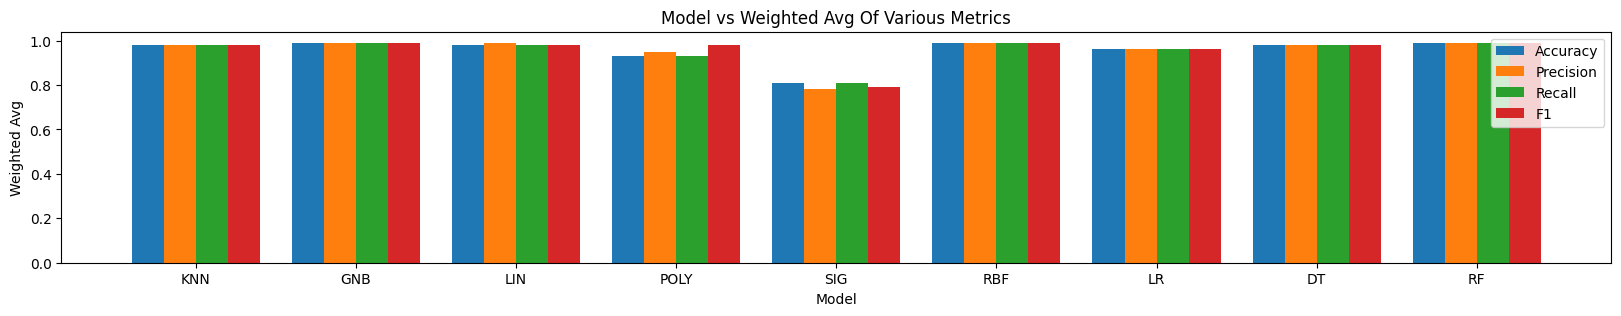

In [ ]:
#creating plot to compare weighted average scores of models
import numpy as np
import matplotlib.pyplot as plt

#Models
X = ['KNN', 'GNB', 'LIN', 'POLY', 'SIG', 'RBF', 'LR','DT','RF']

# Collect this information from the classification reports and store them in lists
accuracy = [0.98, 0.99, 0.98, 0.93, 0.81, 0.99, 0.96,.98,.99]
precision = [.98, 0.99, 0.99, 0.95, 0.78, 0.99, 0.96,.98,.99]
recall = [0.98, 0.99, 0.98, 0.93, 0.81, 0.99, 0.96,.98,.99]
f1 = [0.98, 0.99, 0.98, 0.98, 0.79, 0.99, 0.96,.98,.99]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()
